# PRM-02 Tutorial Session

### Author: Jay Parmar

##### Created on: 19/09/2020

##### Last Updated on: 08/12/2020

### Lecture Agenda
- Portfolio Creation
- Calculating Risk and Returns
- Modern Portfolio Theory
- Security Selection
- Kelly Criterion for Position Sizing
- Calculating Profitability Ratios using Pyfolio

### What this lecture is not?
1. This lecture is *NOT* about Python, but rather Portfolio concepts with the help of Python.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pyfolio as pf

%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('seaborn-ticks')

C:\Anaconda3\envs\epat\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
import pyfolio as pf
pf.__version__

'0.9.2'

# 1) Investing in a Single Stock

In [3]:
# Define the first stock
stk_1 = 'TCS'

In [4]:
# Read stock 1 data and verify its content
stk_1_data = pd.read_csv(stk_1+'.csv', index_col=0, parse_dates=True)

In [5]:
stk_1_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,1283.500000,1283.500000,1270.500000,1272.780029,1089.075073,366830
2015-01-02,1275.500000,1295.469971,1275.300049,1289.719971,1103.570190,925740
2015-01-05,1290.500000,1299.949951,1262.319946,1270.119995,1086.799072,1754242
2015-01-06,1264.550049,1264.550049,1220.000000,1223.300049,1046.736816,2423784
2015-01-07,1235.000000,1239.569946,1203.719971,1208.849976,1034.372314,2636332


In [6]:
stk_1_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-24,2250.600098,2259.949951,2230.000000,2248.100098,2248.100098,2167966
2020-08-25,2245.000000,2250.000000,2233.550049,2242.649902,2242.649902,1663419
2020-08-26,2242.000000,2259.899902,2216.449951,2253.500000,2253.500000,2618149
2020-08-27,2266.000000,2287.350098,2241.750000,2248.399902,2248.399902,3579393
2020-08-28,2268.399902,2279.949951,2235.100098,2238.550049,2238.550049,2941136


### Daily Returns

In [7]:
# Calculate daily percentage changes for stock 1
stk_1_data['daily_returns'] = stk_1_data['Adj Close'].pct_change()

stk_1_data.dropna(inplace=True)

In [8]:
# Function to compute net cumulative returns
def compute_cum_returns(data):
    net_returns = (1 + data).cumprod() - 1
    return net_returns

The cumulative returns for TCS are 105.546%


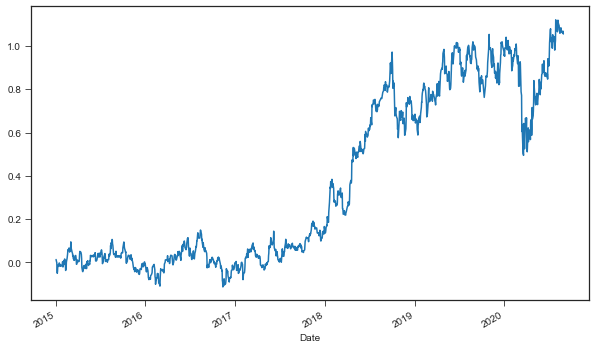

In [9]:
# Calculate cumulative returns for stock 1
stk_1_cum_returns = compute_cum_returns(stk_1_data['daily_returns'])

# Display cumulative returns for stock 1
stk_1_cum_returns.plot(figsize=(10, 6))

# Print the final value
print('The cumulative returns for %s are %.3f%%' % (stk_1, stk_1_cum_returns[-1] * 100))

### Annualized Returns

An annualized total return is the geometric average amount of money earned by an investment each year over a given time period. The annualized return formula is calculated as a geometric average to show what an investor would earn over a period of time if the annual return was compounded.

$$ Annualized Returns = (1 + Cumulative\ Return)^\frac{252}{N} - 1 $$

Where:

$ 252 = $ Number of trading days in year

$ N = $ Number of trading days for a strategy

In [10]:
# Function to compute annualized returns
def compute_ann_returns(cum_returns, n):
    trading_days = 252
    
    ann_returns = ((1 + cum_returns) ** (trading_days/n)) - 1
    
    return ann_returns

In [11]:
# Define length of data
n = len(stk_1_data)

# Compute annualized returns for stk_1
stk_1_annualized_returns = compute_ann_returns(stk_1_cum_returns[-1], n)

print('The annualized returns for %s are %.3f%%' % (stk_1, stk_1_annualized_returns * 100))

The annualized returns for TCS are 13.932%


##### Questions to ask:-

1. Should we invest in only single stock? If yes, why? If no, why not?
2. Is investing in a single stock risky?

### Daily Volatility

In [12]:
# Calculate daily volatility for stock 1
stk_1_daily_volatility = stk_1_data.daily_returns.std()

print('The daily volatility of %s is %.3f%%' % (stk_1, stk_1_daily_volatility))

The daily volatility of TCS is 0.016%


### Annualized Volatility

In [13]:
# Calculate the annualised volatility for stock 1
stk_1_annual_volatility = stk_1_daily_volatility * np.sqrt(252)

print('The annualised volatility of %s is %.3f%%' % (stk_1, stk_1_annual_volatility * 100))

The annualised volatility of TCS is 24.961%


In [14]:
# Comparison
comparison = pd.DataFrame(columns=['ann_returns', 'ann_volatility'])

comparison.loc[stk_1, 'ann_returns'] = round(stk_1_annualized_returns * 100, 3)
comparison.loc[stk_1, 'ann_volatility'] = round(stk_1_annual_volatility * 100, 3)

comparison.head()

,ann_returns,ann_volatility
TCS,13.932,24.961


# 2) Modern Portfolio Theory

In [15]:
# Define stock 2
stk_2 = 'MARUTI'

In [16]:
# Read stock 2 data 
stk_2_data = pd.read_csv(stk_2+'.csv', index_col=0, parse_dates=True)

stk_2_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,3320.25,3360.000000,3320.250000,3340.750000,3135.805908,299232
2015-01-02,3360.00,3383.000000,3350.500000,3359.600098,3153.499756,233924
2015-01-05,3382.00,3469.350098,3376.050049,3447.800049,3236.289062,536747
2015-01-06,3439.00,3439.000000,3382.500000,3395.250000,3186.962646,422743
2015-01-07,3400.00,3458.949951,3382.050049,3437.750000,3226.855225,369241


In [17]:
stk_2_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-24,6985.0,7100.000000,6955.000000,7082.500000,7082.500000,961177
2020-08-25,7100.0,7175.700195,7075.649902,7109.950195,7109.950195,1047620
2020-08-26,7110.0,7158.000000,6972.000000,7008.649902,7008.649902,992395
2020-08-27,7043.0,7127.700195,6960.799805,7098.000000,7098.000000,1158891
2020-08-28,7125.0,7156.000000,7028.450195,7104.100098,7104.100098,1019984


In [18]:
# Compute daily percentage returns for stock 2
stk_2_data['daily_returns'] = stk_2_data['Adj Close'].pct_change()

stk_2_data.dropna(inplace=True)

The cumulative returns for MARUTI are 126.548%


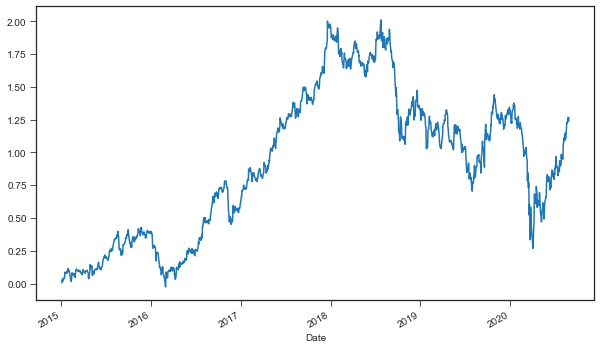

In [19]:
# Calculate cumulative returns for stock 2
stk_2_cum_returns = compute_cum_returns(stk_2_data['daily_returns'])

# Display cumulative returns for stock 2
stk_2_cum_returns.plot(figsize=(10, 6))

# Print the final value
print('The cumulative returns for %s are %.3f%%' % (stk_2, stk_2_cum_returns[-1] * 100))

In [20]:
# Number of trading days for stock 2
n = len(stk_2_data)

# Compute annualized returns for stock 2
stk_2_annualized_returns = compute_ann_returns(stk_2_cum_returns[-1], n)

print('The annualized returns for %s are %.3f%%' % (stk_2, stk_2_annualized_returns * 100))

The annualized returns for MARUTI are 15.957%


In [21]:
# Calculate daily volatility for stock 2
stk_2_daily_volatility = stk_2_data.daily_returns.std()

print('The daily volatility of %s is %.3f%%' % (stk_2, stk_2_daily_volatility))

The daily volatility of MARUTI is 0.019%


In [22]:
# Calculate the annualised volatility for stock 2
stk_2_annual_volatility = stk_2_daily_volatility * np.sqrt(252)

print('The annualised volatility of %s is %.3f%%' % (stk_2, stk_2_annual_volatility * 100))

The annualised volatility of MARUTI is 30.345%


In [23]:
# Update RELIANCE data in 'comparison' dataframe
comparison.loc[stk_2, 'ann_returns'] = round(stk_2_annualized_returns * 100, 3)
comparison.loc[stk_2, 'ann_volatility'] = round(stk_2_annual_volatility * 100, 3)

comparison.head()

,ann_returns,ann_volatility
TCS,13.932,24.961
MARUTI,15.957,30.345


Portfolio Creation Process:

1. Understand the requirement
2. Select the securities
3. Rebalance the portfolio

#####  Questions to ask:

1. Can we do anything to aim similar returns as stock 2, but with lower risk?

In [24]:
# Defining weights for stock 1 and 2 - Equal Allocations
weight_in_stk_1 = 0.5
weight_in_stk_2 = 1 - weight_in_stk_1

### a) Returns of a portfolio

$$ Portfolio\ Returns = (w_A * R_A) + (w_B * R_B)$$

Where:

A = Stock A
<br>B = Stock A

$ w_A = $ Weight in stock A

$ R_A = $ Returns of stock A

$ w_B = $ Weight in stock B

$ R_B = $ Returns of stock B


In [25]:
# Calculate portfolio returns
port_daily_ret = (weight_in_stk_1 * stk_1_data['daily_returns']) + (weight_in_stk_2 * stk_2_data['daily_returns'])

# Storing in a new variable which we will use later
stk_1_2_daily_returns = port_daily_ret

In [26]:
# Calculate cumulative portfolio returns
port_cum_returns = compute_cum_returns(port_daily_ret)

# Print the final value
print('The cumulative returns of a portfolio with %s and %s are %.3f%%' % (stk_1, stk_2, port_cum_returns[-1] * 100))

The cumulative returns of a portfolio with TCS and MARUTI are 133.828%


In [27]:
# Calculate annualized portfolio returns
port_annualized_returns = compute_ann_returns(port_cum_returns[-1], len(port_cum_returns))

print('The annualized returns of a portfolio with %s and %s are %.3f%%' % (stk_1, stk_2, port_annualized_returns * 100))

The annualized returns of a portfolio with TCS and MARUTI are 16.623%


##### Questions to ask:

- How would you compute returns of a portfolio with more than two stocks?

### b) Volatility of a Portfolio

$$ Portfolio\ Variance = w^2_A * \sigma^2(R_A) + w^2_B * \sigma^2(R_B) + 2 * w_A * w_B * cov(R_A, R_B) $$

$$ Portfolio\ Std\ Dev = \sqrt{w^2_A * \sigma^2(R_A) + w^2_B * \sigma^2(R_B) + 2 * w_A * w_B * cov(R_A, R_B)} $$

Where:-

$ w_A = $ Weight in stock A

$ \sigma^2(R_A) = $ Variance of returns of stock A

$ w_B = $ Weight in stock B

$ \sigma^2(R_B) = $ Variance of returns of stock B

$ cov(R_A, R_B) = $ Corvariance between stock A returns and stock B returns

In [28]:
# Calculate covariance between stock 1 and 2
stk_1_2_cov = np.cov(stk_1_data['daily_returns'], stk_2_data['daily_returns'])

In [29]:
var_cov_matrix = pd.DataFrame(stk_1_2_cov, columns=['Stock 1', 'Stock 2'], index=['Stock 1', 'Stock 2'])

var_cov_matrix

,Stock 1,Stock 2
Stock 1,0.000247,0.000075
Stock 2,0.000075,0.000365


In [30]:
print('The covariance between %s and %s is %.6f' % (stk_1, stk_2, stk_1_2_cov[0, 1]))

The covariance between TCS and MARUTI is 0.000075


In [31]:
# Calculate daily volatility of a portfolio
port_daily_variance = (weight_in_stk_1 * stk_1_daily_volatility) ** 2 + (weight_in_stk_2 * stk_2_daily_volatility) ** 2 + \
                        2 * weight_in_stk_1 * weight_in_stk_2 * stk_1_2_cov[0, 1]

port_daily_volatility = np.sqrt(port_daily_variance)

print('The daily volatility of a portfolio with %s and %s is %.3f%%' % (stk_1, stk_2, port_daily_volatility))

The daily volatility of a portfolio with TCS and MARUTI is 0.014%


In [32]:
# Calculate the annualised volatility of the portfolio
port_annualized_volatility = port_daily_volatility * np.sqrt(252)

print('The annualised volatility of a portfolio with %s and %s is %.3f%%' % (stk_1, stk_2, port_annualized_volatility * 100))

The annualised volatility of a portfolio with TCS and MARUTI is 21.921%


In [33]:
# Update the portfolio data in 'comparison' dataframe
comparison.loc[stk_1 + '_' + stk_2, 'ann_returns'] = round(port_annualized_returns * 100)
comparison.loc[stk_1 + '_' + stk_2, 'ann_volatility'] = round(port_annualized_volatility * 100, 3)

comparison.head()

,ann_returns,ann_volatility
TCS,13.932,24.961
MARUTI,15.957,30.345
TCS_MARUTI,17,21.921


##### Questions to ask:

1. Did investing in two stocks reduced the risk?
2. What can be the potential problem with the current portfolio?
3. Can we further reduce the risk?

In [34]:
# Correlation between stock 1 and 2
corr = np.corrcoef(stk_1_data['daily_returns'], stk_2_data['daily_returns'])[0, 1]

print('A correlation between %s and %s is %.3f' % (stk_1, stk_2, corr))

A correlation between TCS and MARUTI is 0.250


# 3) Investing in Two Uncorrelated Securities

### a) Download Stock Data and Compute Volatility and Returns

In [35]:
# Define stock 3
stk_3 = 'MARICO'

In [36]:
# Read stock 3 data
stk_3_data = pd.read_csv(stk_3 + '.csv', index_col=0, parse_dates=True)

# Verify the data
stk_3_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,164.000000,164.000000,161.574997,161.925003,146.834793,142730
2015-01-02,162.800003,165.899994,162.050003,164.975006,149.600540,658102
2015-01-05,163.500000,165.500000,161.600006,161.975006,146.880127,953386
2015-01-06,161.550003,165.500000,160.750000,163.824997,148.557693,1854742
2015-01-07,163.850006,164.875000,158.550003,161.000000,145.995987,1531050


In [37]:
# Compute daily percentage returns for stock 3
stk_3_data['daily_returns'] = stk_3_data['Adj Close'].pct_change()

stk_3_data.dropna(inplace=True)

The cumulative returns of MARICO are 152.853%


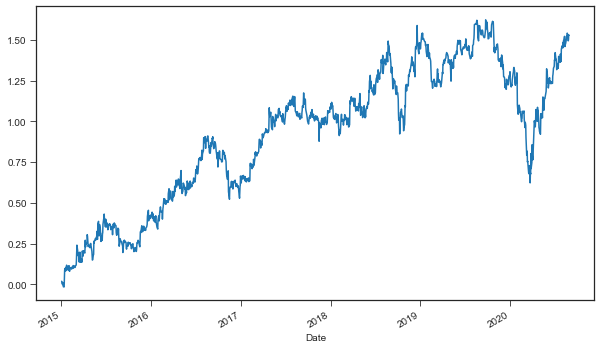

In [38]:
# Calculate cumulative returns for stock 3
stk_3_cum_returns = compute_cum_returns(stk_3_data['daily_returns'])

# Display cumulative returns for stock 3
stk_3_cum_returns.plot(figsize=(10, 6))

# Print the final value
print('The cumulative returns of %s are %.3f%%' % (stk_3, stk_3_cum_returns[-1] * 100))

In [39]:
# Calculate daily volatility for stock 3
stk_3_daily_volatility = stk_3_data.daily_returns.std()

print('The daily volatility of %s is %.3f%%' % (stk_3, stk_3_daily_volatility))

The daily volatility of MARICO is 0.017%


### b) Check Correlation

In [40]:
# Check correlation between stock 1 and stock 3
corr = np.corrcoef(stk_1_data['daily_returns'], stk_3_data['daily_returns'])[0, 1]

print('A correlation between %s and %s is %.3f' % (stk_1, stk_3, corr))

A correlation between TCS and MARICO is 0.119


### c) Build Portfolio and Calculate Expected Returns

In [41]:
# Defining weights for stock 1 and stock 3 - Equal Allocations
weight_in_stk_1 = 0.5
weight_in_stk_3 = 1 - weight_in_stk_1

In [42]:
# Calculate portfolio returns
port_daily_returns = (weight_in_stk_1 * stk_1_data['daily_returns']) + (weight_in_stk_3 * stk_3_data['daily_returns'])

# Storing in a new variable which we will use later
stk_1_3_daily_returns = port_daily_returns

In [43]:
# Calculate cumulative portfolio returns
port_cum_returns = compute_cum_returns(port_daily_returns)

# Print the final value
print('The cumulative return of a portfolio with %s and %s is %.3f%%' % (stk_1, stk_3, port_cum_returns[-1] * 100))

The cumulative return of a portfolio with TCS and MARICO is 146.818%


In [44]:
# Calculate annualized returns of the portfolio
port_annualized_returns = compute_ann_returns(port_cum_returns[-1], len(port_cum_returns))

print('The annualized returns of a portfolio with %s and %s are %.3f%%' % (stk_1, stk_3, port_annualized_returns * 100))

The annualized returns of a portfolio with TCS and MARICO are 17.770%


### d) Calculate Standard Deviation of a Portfolio

In [45]:
# Calculate the covariance between stock 1 and stock 3
stk_1_3_cov = np.cov(stk_1_data['daily_returns'], stk_3_data['daily_returns'])

print('The covariance between %s and %s is %.6f' % (stk_1, stk_3, stk_1_3_cov[0, 1]))

The covariance between TCS and MARICO is 0.000031


In [46]:
# Calculate daily volatility of a portfolio
port_daily_variance = (weight_in_stk_1 * stk_1_daily_volatility) ** 2 \
                            + (weight_in_stk_3 * stk_3_daily_volatility) ** 2 \
                            + 2 * weight_in_stk_1 * weight_in_stk_3 * stk_1_3_cov[0, 1]

port_daily_volatility = np.sqrt(port_daily_variance)

print('The daily volatility of a portfolio with %s and %s is %.3f%%' % (stk_1, stk_3, port_daily_volatility))

The daily volatility of a portfolio with TCS and MARICO is 0.012%


In [47]:
# Calculate the annualised volatility of the portfolio
port_annualized_volatility = port_daily_volatility * np.sqrt(252)

print('The annualised volatility of a portfolio with %s and %s is %.3f%%' % (stk_1, stk_3, port_annualized_volatility * 100))

The annualised volatility of a portfolio with TCS and MARICO is 19.154%


In [48]:
# Update HDFCBANK and MARICO data in 'comparison' dataframe
comparison.loc[stk_1 + '_' + stk_3, 'ann_returns'] = round(port_annualized_returns * 100, 3)
comparison.loc[stk_1 + '_' + stk_3, 'ann_volatility'] = round(port_annualized_volatility * 100, 3)

comparison.head()

,ann_returns,ann_volatility
TCS,13.932,24.961
MARUTI,15.957,30.345
TCS_MARUTI,17,21.921
TCS_MARICO,17.77,19.154


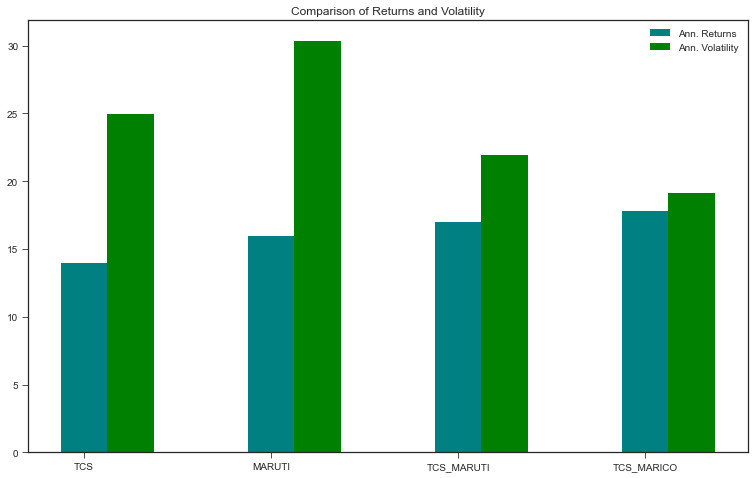

In [49]:
# Visualize the data
x = np.arange(4)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0,0,1,1])
ax.bar(x + 0.00, comparison.ann_returns, color='teal', width = 0.25, label='Ann. Returns')
ax.bar(x + 0.25, comparison.ann_volatility, color='g', width = 0.25, label='Ann. Volatility')

ax.set_title('Comparison of Returns and Volatility')
ax.set_xticks(x)
ax.set_xticklabels(comparison.index)
ax.legend()

fig.tight_layout()
plt.show()

##### Questions to ask:

- Have we achieved our goal?

### e) Optimize Portfolio Weights

In [50]:
# Create various portfolios with different weights
weight_in_stk_1 = np.arange(0, 1, step=0.01)

weight_in_stk_1

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [51]:
weight_in_stk_3 = 1 - weight_in_stk_1

weight_in_stk_3

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01])

In [52]:
# Create empty dataframe and dictionary to hold data for all portfolios
portfolios = pd.DataFrame(columns=[stk_1, stk_3, 'Ann_Returns', 'Ann_Volatility'])

# Create empty dictionary to hold new data for each portfolio
data_to_be_updated = {}

In [53]:
# Iterate through each combination of weights in stock 1 and stock 3
for w_i in weight_in_stk_1:
    for w_d in weight_in_stk_3:
        
        # Select only those portfolios whose weights are equal to 1
        if (w_i + w_d) == 1:

            # Calculate expected returns for each portfolio
            port_daily_returns = (w_i * stk_1_data.daily_returns) + (w_d * stk_3_data.daily_returns)

            # Calculate cumulative returns for each portfolio
            port_cum_returns = compute_cum_returns(port_daily_returns)
            
            # Calculate annualized returns for each portfolio
            port_annualized_returns = compute_ann_returns(port_cum_returns[-1], len(port_cum_returns))

            # Calculate daily volatility for each portfolio
            port_daily_volatility = np.sqrt((w_i * stk_1_daily_volatility) ** 2 \
                                + (w_d * stk_3_daily_volatility) ** 2 \
                                + 2 * w_i * w_d * stk_1_3_cov[0, 1])

            # Calculate annualized volatility for each portfolio
            port_annualized_volatility = port_daily_volatility * np.sqrt(252)
            
            print(f'{stk_1}: {round(w_i, 2)} | {stk_3}: {round(w_d, 2)} | Ann. Returns: {round(port_annualized_returns, 4)} | Ann. Vol: {round(port_annualized_volatility, 4)}')
            
            # Update weights, annual returns and volatility the current portfolio
            data_to_be_updated[stk_1] = round(w_i, 2)
            data_to_be_updated[stk_3] = round(w_d, 2)
            data_to_be_updated['Ann_Returns'] = round(port_annualized_returns, 4)
            data_to_be_updated['Ann_Volatility'] = round(port_annualized_volatility, 4)
            
            # Append the current portfolio data to the dataframe
            portfolios = portfolios.append(data_to_be_updated, ignore_index=True)
else:
    print('Computations completed!')

TCS: 0.0 | MARICO: 1.0 | Ann. Returns: 0.1829 | Ann. Vol: 0.2623
TCS: 0.01 | MARICO: 0.99 | Ann. Returns: 0.1831 | Ann. Vol: 0.26
TCS: 0.02 | MARICO: 0.98 | Ann. Returns: 0.1833 | Ann. Vol: 0.2577
TCS: 0.03 | MARICO: 0.97 | Ann. Returns: 0.1835 | Ann. Vol: 0.2555
TCS: 0.04 | MARICO: 0.96 | Ann. Returns: 0.1837 | Ann. Vol: 0.2532
TCS: 0.05 | MARICO: 0.95 | Ann. Returns: 0.1839 | Ann. Vol: 0.251
TCS: 0.06 | MARICO: 0.94 | Ann. Returns: 0.184 | Ann. Vol: 0.2488
TCS: 0.07 | MARICO: 0.93 | Ann. Returns: 0.1842 | Ann. Vol: 0.2467
TCS: 0.08 | MARICO: 0.92 | Ann. Returns: 0.1843 | Ann. Vol: 0.2445
TCS: 0.09 | MARICO: 0.91 | Ann. Returns: 0.1844 | Ann. Vol: 0.2424
TCS: 0.1 | MARICO: 0.9 | Ann. Returns: 0.1845 | Ann. Vol: 0.2404
TCS: 0.11 | MARICO: 0.89 | Ann. Returns: 0.1846 | Ann. Vol: 0.2383
TCS: 0.12 | MARICO: 0.88 | Ann. Returns: 0.1847 | Ann. Vol: 0.2363
TCS: 0.13 | MARICO: 0.87 | Ann. Returns: 0.1848 | Ann. Vol: 0.2343
TCS: 0.14 | MARICO: 0.86 | Ann. Returns: 0.1848 | Ann. Vol: 0.2324
TCS

In [54]:
portfolios.head(20)

,TCS,MARICO,Ann_Returns,Ann_Volatility
0,0.00,1.00,0.1829,0.2623
1,0.01,0.99,0.1831,0.2600
2,0.02,0.98,0.1833,0.2577
3,0.03,0.97,0.1835,0.2555
4,0.04,0.96,0.1837,0.2532
5,0.05,0.95,0.1839,0.2510
6,0.06,0.94,0.1840,0.2488
7,0.07,0.93,0.1842,0.2467
8,0.08,0.92,0.1843,0.2445
9,0.09,0.91,0.1844,0.2424


#### Minimum Risk Portfolio

In [55]:
# Minimum Risk Portfolio
min_risk_portfolios = portfolios.loc[portfolios.Ann_Volatility == portfolios.Ann_Volatility.min()]

min_x = min_risk_portfolios.Ann_Volatility.iloc[0]
min_y = min_risk_portfolios.Ann_Returns.iloc[0]

min_risk_portfolios

,TCS,MARICO,Ann_Returns,Ann_Volatility
52,0.52,0.48,0.1768,0.1913
53,0.53,0.47,0.1763,0.1913
54,0.54,0.46,0.1758,0.1913


#### Portfolio with Maximum Returns/Unit of Risk

In [56]:
# Create a new column with maximum returns per unit of risk
portfolios['max_returns/risk'] = portfolios['Ann_Returns'] / portfolios['Ann_Volatility']

# Find the portfolio with maximum returns per unit of risk
sharpe_portfolios = portfolios.loc[portfolios['max_returns/risk'] == portfolios['max_returns/risk'].max()]

sharpe_x = sharpe_portfolios.Ann_Volatility.iloc[0]
sharpe_y = sharpe_portfolios.Ann_Returns.iloc[0]

sharpe_portfolios

,TCS,MARICO,Ann_Returns,Ann_Volatility,max_returns/risk
46,0.46,0.54,0.1794,0.1927,0.930981


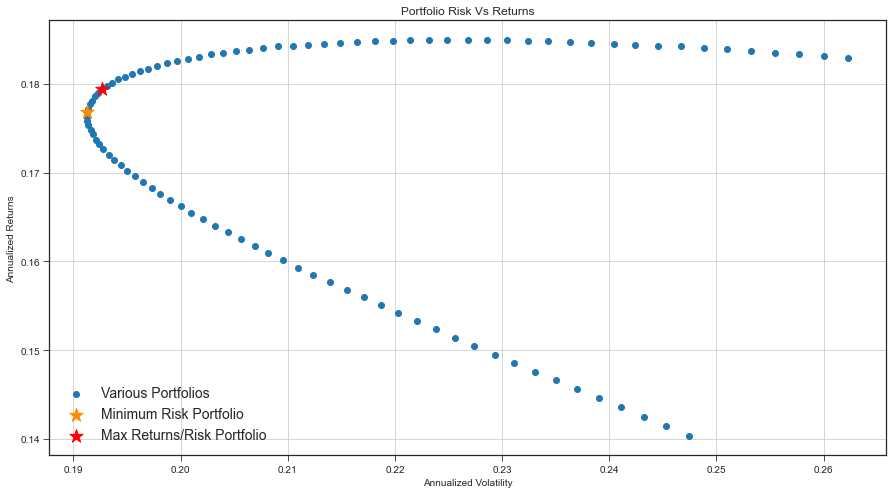

In [57]:
# Plotting it visually
fig = plt.figure(figsize=(15, 8))
plt.scatter(x='Ann_Volatility', y='Ann_Returns', data=portfolios, label='Various Portfolios')
plt.scatter(x=min_x, y=min_y, marker='*', s=200, color='darkorange', label='Minimum Risk Portfolio')
plt.scatter(x=sharpe_x, y=sharpe_y, marker='*', s=200, color='red', label='Max Returns/Risk Portfolio')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Returns')
plt.title('Portfolio Risk Vs Returns')
plt.legend(loc='best', fontsize=14)
plt.grid()
plt.show()

In [72]:
import plotly.express as px
fig = px.scatter(portfolios, x="Ann_Volatility", y="Ann_Returns", hover_data=[stk_1, stk_3])
fig.show()

##### Questions to ask:

1. Did we lowered all the risk?
2. What can we do to further reduce the risk?
3. Can we reduce risk to 0?

---

# 4) Kelly Crieterion for Position Sizing

You have \\$100 and you bet **\\$40** on a bet. Following is the bet outcome:

- **Win Payout**: If you win, you get invested amount plus 10% of the invested amount.
    - Final amount would be 100 + (40 \* 0.1) = 104



- **Loss Payout**: If you lose, you lose the 30% of the invested amount.
    - Final amount would be 100 - (40 * 0.3) = 88
    

If you play this bet multiple times, *how much should you invest in each bet?*


In trading analogy,

- \\$100 = Initial Capital
- \\$40 = Fraction of capital invested
- Win Payout = Profit
- Loss Payout = Loss
- Bet = Trade

---

An investor begins with \\$1 and invests a fraction($k$) in an investment with two potential outcomes. 

- If the investment succeeds, it returns $B$ and the portfolio will be worth $1 + kB$. 
- If it fails, it loses $A$ and the portfolio will be worth $1 – kA$.

The profit after $n$ trades would be 

$$P_n = (1 + kB)^{wn} * (1 - kA)^{(1-w)n}$$

Where:

$ A = $ Loss payout *(Average loss per trade)*

$ B = $ Win payout *(Average profit per trade)*

$ n = $ Number of trades

$ w = $ Probability of winning *(# winning trades / total trades)*

$ 1 - w = $ Probability of losing *(# losing trades / total trades)*

-----
Rearranging the above formula when $n$ tends to infinite, we get:

$$ k = (w \div A) - (1-w \div B) $$

Where:

$ k = $ Fraction of wealth we want to invest

In [59]:
initial_wealth = 1 

# Define Payouts
loss_payout = 0.5 # (A | Average loss per trade)
win_payout = 0.9 # (B | Average profit per trade)

# Define Probabilities (Sum of both probabilities should be equal to 1)
win_prob = 0.6 # (w | # winning trades / total trades)
loss_prob = 0.4 # 1 - win_prob (1-w | # losing trades / total trades)

# Total trades
n_trades = 100 # (n)

In [60]:
# Calculate fraction of wealth to be traded using Kelly Criterion
k = (win_prob / loss_payout) - (loss_prob / win_payout)

print(f'One should invest {round(k, 2)} fraction of wealth in each trade.')

One should invest 0.76 fraction of wealth in each trade.


In [61]:
# Calcuate wealth after 'n' trade
p = (1 + k * win_payout) ** (win_prob * n_trades) * (1 - k * loss_payout) ** (loss_prob * n_trades)

print(f'The final wealth would be ~{round(p, 3)}')

The final wealth would be ~188963.362


In [62]:
# To Cross Verify
# Generate wealth for various fractions
fraction_list = np.arange(0, 1, 0.01)

# Create empty list to store wealth for each fraction
wealth = []

In [63]:
fraction_list

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [64]:
# Iterate over each fraction value and compute wealth for it
for k in fraction_list:
    
    # Calculate wealth
    p = (1 + k * win_payout)**(win_prob * n_trades) * (1 - k * loss_payout)**(loss_prob * n_trades)
    
    # Append the wealth value to the list
    wealth.append(p)
else:
    print('Computations completed!')

Computations completed!


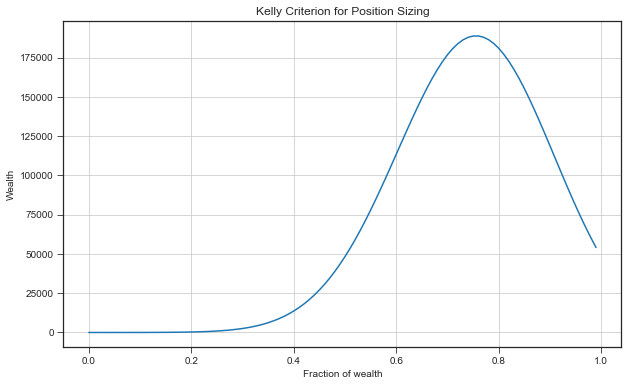

In [65]:
# Plot wealth for all fractions
plt.figure(figsize=(10,6))
plt.plot(fraction_list, wealth)
plt.xlabel('Fraction of wealth')
plt.ylabel('Wealth')
plt.title('Kelly Criterion for Position Sizing')
plt.grid()
plt.show()

# 5) Profitability Ratios

#### a) Sharpe Ratio

The Sharpe ratio is the excess return calculated as total returns less the risk-free rate of return per unit of volatility. Generally, risk-free return is the return on the risk-free assets such as government bonds. The excess returns are due to the 'extra risk' taken by the investor on investing in risky assets.

It tells whether the returns on a portfolio are due to good investment decision or the result of excessive risk taken. Higher Sharpe ratio is always preferable over the lower ones.

The Sharpe Ratio can be used to compare the portfolio with the benchmark to get to know how your portfolio is repaying for the risk taken on the investment.

$$ Sharpe\ Ratio\ =\ \frac{R_p - R_f}{\sigma_p} $$

Where:

$ R_p $ = Portfolio Returns

$ R_f $ = Risk-free Returns

$ \sigma_p $ = Standard deviation of the portfolio returns

In [66]:
risk_free_rate = 0.00 # Annualized

# Calculate Sharpe Ratio
daily_sharpe = (np.mean(stk_1_data['daily_returns']) - (risk_free_rate/252))/ np.std(stk_1_data['daily_returns'])

# Calculate Annualized Sharpe Ratio
ann_sharpe = daily_sharpe * np.sqrt(252)

print("The Sharpe ratio is %.2f" % ann_sharpe)

The Sharpe ratio is 0.65


In [67]:
comparison.head()

,ann_returns,ann_volatility
TCS,13.932,24.961
MARUTI,15.957,30.345
TCS_MARUTI,17,21.921
TCS_MARICO,17.77,19.154


Start date,2015-01-02
End date,2020-08-28
Total months,66
,Backtest
Annual return,13.9%
Cumulative returns,105.5%
Annual volatility,25.0%
Sharpe ratio,0.65
Calmar ratio,0.51
Stability,0.82
Max drawdown,-27.2%


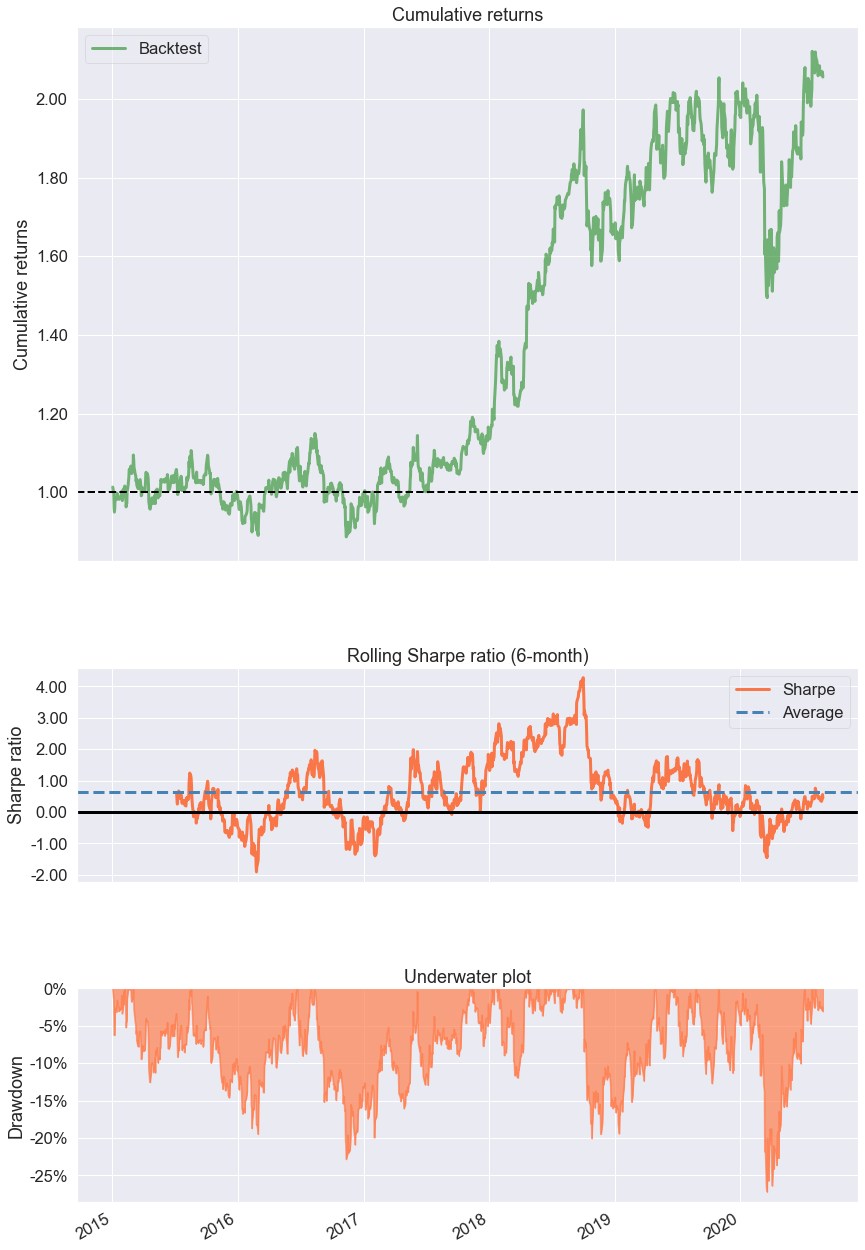

In [68]:
# Daily returns of stock 1
pf.create_simple_tear_sheet(stk_1_data.daily_returns)

Start date,2015-01-02
End date,2020-08-28
Total months,66
,Backtest
Annual return,17.8%
Cumulative returns,146.8%
Annual volatility,19.2%
Sharpe ratio,0.95
Calmar ratio,0.59
Stability,0.92
Max drawdown,-30.3%


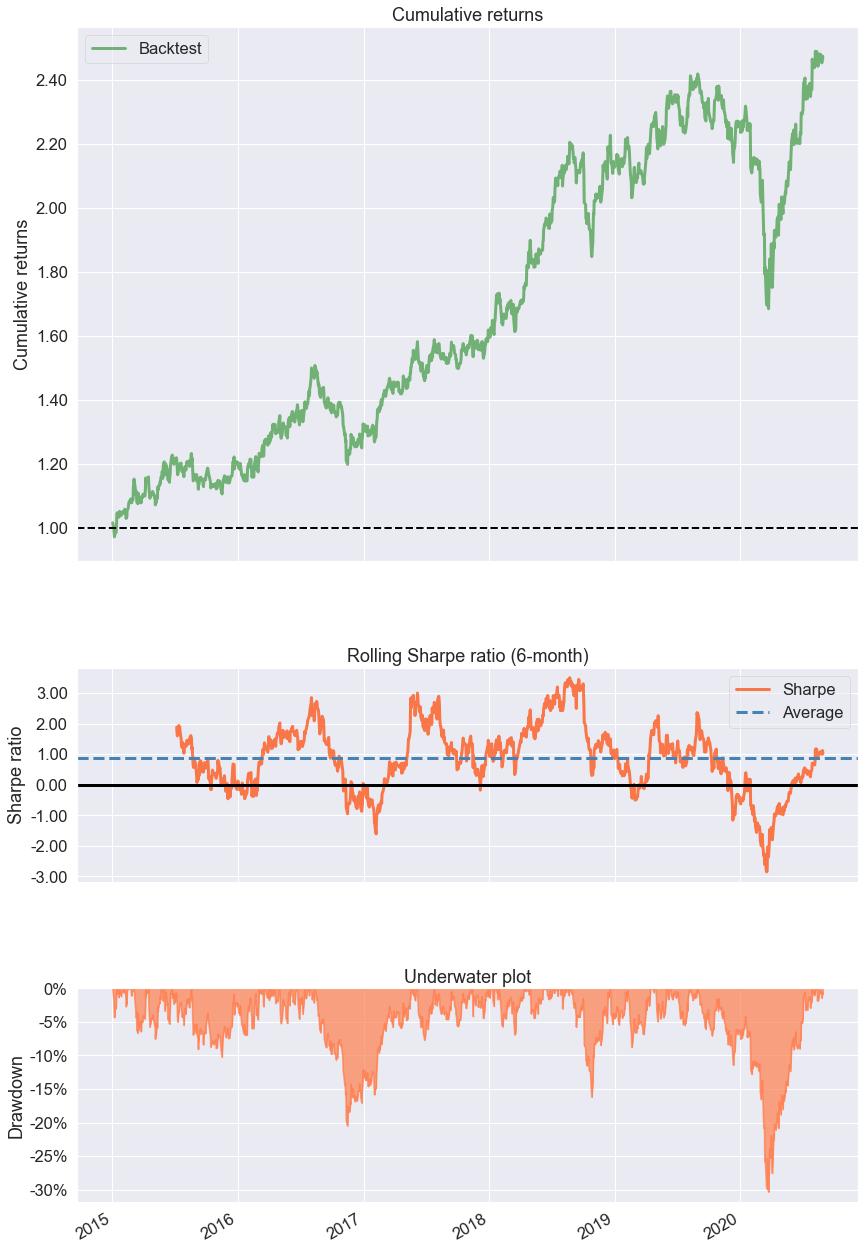

In [69]:
# Tear sheet for Stock 1 and Stock 3
pf.create_simple_tear_sheet(stk_1_3_daily_returns)

#### b) Sortino Ratio
In the Sortino ratio, the denominator of the Sharpe ratio, the total standard deviation is replaced with the downside deviation. The downside deviation is the standard deviation of negative asset return.

It differentiates the harmful volatility from the total volatility by using the standard deviation of negative returns only. Since an investor is concerned only about the downside volatility, Sortino ratio is a good measure in comparing the highly volatile portfolios whereas the Sharpe ratio is better at analyzing portfolios with low volatility. The probability of large loss will be low if the value of the Sortino ratio is high.

$$ Sortino\ Ratio\ =\ \frac{R_p - R_f}{\sigma_d} $$

Where:

$ R_p $ = Portfolio Returns
<br>$ R_f $ = Risk-free Returns
<br>$ \sigma_d $ = Standard deviation of the negative asset returns

#### c) Treynor Ratio
Treynor Ratio is the variation in the denominator of the Sharpe ratio by replacing the total standard deviation with the beta of the portfolio. It also highlights the risk-adjusted performance of the portfolio. Higher the Treynor ratio, more suitable the investment is. The ratio is based on historical returns data, it is not necessary it will replicate in the future. The higher ratio tells that investment is good but it does not quantify how much good the investment is.

$$ Treynor\ Ratio\ =\ \frac{R_p - R_f}{\beta_p} $$

Where:

$ R_p $ = Portfolio Returns
<br>$ R_f $ = Risk-free Returns
<br>$ \beta_p $ = Portfolio's Beta

# Resources

- [Portfolio Management Of Multiple Strategies Using Python](https://blog.quantinsti.com/portfolio-management-strategy-python/)
- [Portfolio Optimization Methods](https://blog.quantinsti.com/portfolio-optimization-methods/)
- [Portfolio Analysis: Performance Measurement And Evaluation](https://blog.quantinsti.com/portfolio-analysis-performance-measurement-evaluation/)
- [Calculating The Covariance Matrix And Portfolio Variance](https://blog.quantinsti.com/calculating-covariance-matrix-portfolio-variance/)
- [Optimal Portfolio Construction Using Machine Learning](https://blog.quantinsti.com/optimal-portfolio-construction-machine-learning/)
- [Sharpe Ratio: Calculation, Application, Limitations](https://blog.quantinsti.com/sharpe-ratio-applications-algorithmic-trading/)
- [Volatility And Measures Of Risk-Adjusted Return With Python](https://blog.quantinsti.com/volatility-and-measures-of-risk-adjusted-return-based-on-volatility/)
---